<a href="https://colab.research.google.com/github/benbaz-2/comp551/blob/main/assignment_1_regression_aziz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Installing and importing packages

In [29]:
!pip install ucimlrepo;
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;
import seaborn as sns;
from sklearn.metrics import r2_score;
from sklearn.metrics import mean_squared_error;
from sklearn.model_selection import train_test_split;
from sklearn.preprocessing import StandardScaler;
import time;
import pdb

###Loading the data

In [30]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
infrared_thermography_temperature = fetch_ucirepo(id=925)

# data (as pandas dataframes)
X = infrared_thermography_temperature.data.features
y = infrared_thermography_temperature.data.targets

# metadata
print(infrared_thermography_temperature.metadata)

# variable information
print(infrared_thermography_temperature.variables)


{'uci_id': 925, 'name': 'Infrared Thermography Temperature', 'repository_url': 'https://archive.ics.uci.edu/dataset/925/infrared+thermography+temperature+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/925/data.csv', 'abstract': 'The Infrared Thermography Temperature Dataset contains temperatures read from various locations of inferred images about patients, with the addition of oral temperatures measured for each individual. The 33 features consist of gender, age, ethnicity, ambiant temperature, humidity, distance, and other temperature readings from the thermal images. The dataset is intended to be used in a regression task to predict the oral temperature using the environment information as well as the thermal image readings. ', 'area': 'Health and Medicine', 'tasks': ['Regression'], 'characteristics': ['Tabular'], 'num_instances': 1020, 'num_features': 33, 'feature_types': ['Real', 'Categorical'], 'demographics': ['Gender', 'Age', 'Ethnicity'], 'target_col': ['aveO

###Data cleaning and exploratory data analysis

In [31]:
#Taking a look at the data
pd.set_option('display.max_columns', None);
X.head()

,Gender,Age,Ethnicity,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,aveAllL13_1,T_RC1,T_RC_Dry1,T_RC_Wet1,T_RC_Max1,T_LC1,T_LC_Dry1,T_LC_Wet1,T_LC_Max1,RCC1,LCC1,canthiMax1,canthi4Max1,T_FHCC1,T_FHRC1,T_FHLC1,T_FHBC1,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1
0,Male,41-50,White,24.0,28.0,0.8,0.7025,35.0300,35.3775,34.4000,34.9175,34.9850,34.9850,34.7625,35.0325,35.3375,35.3375,34.4850,35.3775,34.7850,34.4650,35.3775,35.3375,33.5775,33.4775,33.3725,33.4925,33.0025,34.5300,34.0075,35.6925,35.6350,35.6525
1,Female,31-40,Black or African-American,24.0,26.0,0.8,0.7800,34.5500,34.5200,33.9300,34.2250,34.7100,34.6325,34.6400,34.7425,34.5600,34.5375,34.3500,34.5750,34.3225,34.2400,34.7400,34.7150,34.0325,34.0550,33.6775,33.9700,34.0025,34.6825,34.6600,35.1750,35.0925,35.1075
2,Female,21-30,White,24.0,26.0,0.8,0.8625,35.6525,35.5175,34.2775,34.8000,35.6850,35.6675,35.6150,35.7175,35.5025,35.5025,35.2950,35.5300,35.3575,35.0925,35.7175,35.6825,34.9000,34.8275,34.6475,34.8200,34.6700,35.3450,35.2225,35.9125,35.8600,35.8850
3,Female,21-30,Black or African-American,24.0,27.0,0.8,0.9300,35.2225,35.6125,34.3850,35.2475,35.2075,35.2000,35.1175,35.2250,35.5950,35.5950,35.3275,35.6125,34.9100,35.1700,35.6125,35.5950,34.4400,34.4225,34.6550,34.3025,34.9175,35.6025,35.3150,35.7200,34.9650,34.9825
4,Male,18-20,White,24.0,27.0,0.8,0.8950,35.5450,35.6650,34.9100,35.3675,35.6025,35.4750,35.5700,35.6400,35.6400,35.6400,35.0775,35.6675,35.3550,35.1200,35.6650,35.6475,35.0900,35.1600,34.3975,34.6700,33.8275,35.4175,35.3725,35.8950,35.5875,35.6175


In [32]:
# Checking number of features and instances
X.shape

(1020, 33)

In [33]:
#Checking the dimensions of y
y.shape

(1020, 2)

In [34]:
#Only need aveoralm
y = y['aveOralM']

In [35]:
# Checking data types
# gender, age, and ethnicity are listed as objects so they may have different types or contain nan values
X.dtypes

,0
Gender,object
Age,object
Ethnicity,object
T_atm,float64
Humidity,float64
Distance,float64
T_offset1,float64
Max1R13_1,float64
Max1L13_1,float64
aveAllR13_1,float64


In [36]:
# Computing descriptive statistics for numerical data
# It seems that distance is missing two values
# Distance also seems to have a very big outlier
X.describe()

,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,aveAllL13_1,T_RC1,T_RC_Dry1,T_RC_Wet1,T_RC_Max1,T_LC1,T_LC_Dry1,T_LC_Wet1,T_LC_Max1,RCC1,LCC1,canthiMax1,canthi4Max1,T_FHCC1,T_FHRC1,T_FHLC1,T_FHBC1,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1
count,1020.000000,1020.000000,1018.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000
mean,24.115392,28.723039,0.729784,0.968648,35.596533,35.611474,34.888475,35.011345,35.659921,35.587143,35.547315,35.689762,35.640851,35.610869,35.468624,35.670962,35.253563,35.208961,35.787509,35.758025,34.573865,34.567782,34.565340,34.487701,34.577293,35.421555,35.094144,36.084785,35.805519,35.838277
std,1.336338,13.071627,2.456486,0.362587,0.574888,0.549760,0.718613,0.633836,0.553897,0.569278,0.568828,0.553594,0.541169,0.545645,0.566434,0.540748,0.605968,0.584393,0.533453,0.533313,0.672461,0.669410,0.678663,0.668065,0.728678,0.523477,0.576045,0.491821,0.559258,0.559316
min,20.200000,9.900000,0.540000,-0.590000,33.897500,34.122500,31.770000,32.902500,33.985000,33.825000,33.932500,34.002500,34.105000,34.105000,33.730000,34.122500,33.617500,33.385000,34.375000,34.352500,31.050000,31.452500,31.657500,31.280000,31.150000,33.407500,32.440000,34.892500,33.802500,33.835000
25%,23.400000,17.600000,0.600000,0.772500,35.247500,35.271875,34.456250,34.651250,35.332500,35.249375,35.210000,35.360000,35.309375,35.278750,35.127500,35.331875,34.886250,34.863750,35.455000,35.426875,34.213125,34.180000,34.177500,34.096875,34.225000,35.116875,34.756458,35.775000,35.474375,35.500000
50%,24.000000,26.300000,0.620000,0.940000,35.548750,35.575000,34.915000,34.997500,35.602500,35.533750,35.482500,35.631250,35.597500,35.572500,35.425000,35.626250,35.203750,35.167500,35.713750,35.686250,34.605000,34.597500,34.602500,34.512917,34.622500,35.391250,35.100000,36.027500,35.790000,35.825000
75%,24.700000,36.200000,0.700000,1.140000,35.872500,35.883125,35.300000,35.363125,35.910625,35.855625,35.808125,35.940625,35.895000,35.863125,35.755000,35.922500,35.562500,35.498125,36.030625,36.002500,34.965625,34.968125,34.965000,34.878125,35.012500,35.675000,35.415000,36.280000,36.087500,36.120625
max,29.100000,61.200000,79.000000,2.875000,38.405000,38.042500,37.575000,37.680000,38.385000,38.380000,38.330000,38.407500,38.042500,38.037500,37.960000,38.075000,38.155000,37.827500,38.407500,38.382500,37.125000,37.075000,37.165000,37.212500,37.367500,38.002500,37.632500,38.807500,38.417500,38.455000


In [37]:
# Checking value counts for categorical variables
# Mostly young people in this dataset. Results may not generalize to older populations
X['Age'].value_counts()

,count
Age,
18-20,534
21-25,355
26-30,67
31-40,31
51-60,11
21-30,10
41-50,9
>60,3


In [38]:
# Mostly white people in this dataset. Results may not generalize to other ethnicities
X['Ethnicity'].value_counts()

,count
Ethnicity,
White,506
Asian,260
Black or African-American,143
Hispanic/Latino,57
Multiracial,50
American Indian or Alaskan Native,4


In [39]:
# This looks relatively balanced
X['Gender'].value_counts()

,count
Gender,
Female,606
Male,414


In [40]:
# Checking for nan values
# As observed previously, distance has two missing values
X.isna().sum()

,0
Gender,0
Age,0
Ethnicity,0
T_atm,0
Humidity,0
Distance,2
T_offset1,0
Max1R13_1,0
Max1L13_1,0
aveAllR13_1,0


In [41]:
# Finding the rows with nan values
X[X['Distance'].isna()]

,Gender,Age,Ethnicity,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,aveAllL13_1,T_RC1,T_RC_Dry1,T_RC_Wet1,T_RC_Max1,T_LC1,T_LC_Dry1,T_LC_Wet1,T_LC_Max1,RCC1,LCC1,canthiMax1,canthi4Max1,T_FHCC1,T_FHRC1,T_FHLC1,T_FHBC1,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1
902,Female,18-20,White,23.9,15.3,NaN,0.8100,35.735,35.4150,35.0525,34.6275,35.7000,35.7000,35.5200,35.7350,35.4450,35.4100,35.290,35.460,35.3150,35.010,35.735,35.6975,34.5750,34.73,34.675,34.7075,34.77,35.3900,35.1925,36.0075,35.8675,35.895
903,Male,18-20,White,23.9,15.3,NaN,0.7775,35.620,35.6275,34.3650,33.8125,35.6675,35.5975,35.5925,35.7025,35.6425,35.5975,35.505,35.685,35.3475,35.295,35.725,35.6950,33.4375,33.59,33.840,33.1125,33.35,34.8675,34.4825,36.3350,36.0425,36.080


In [42]:
#removing nan values
X = X.drop(index=[902, 903])
y = y.drop(index=[902, 903])

In [43]:
#Checking out the distribution of y
y.describe()

,aveOralM
count,1018.000000
mean,37.028163
std,0.509743
min,35.540000
25%,36.752500
50%,36.940000
75%,37.140000
max,40.340000


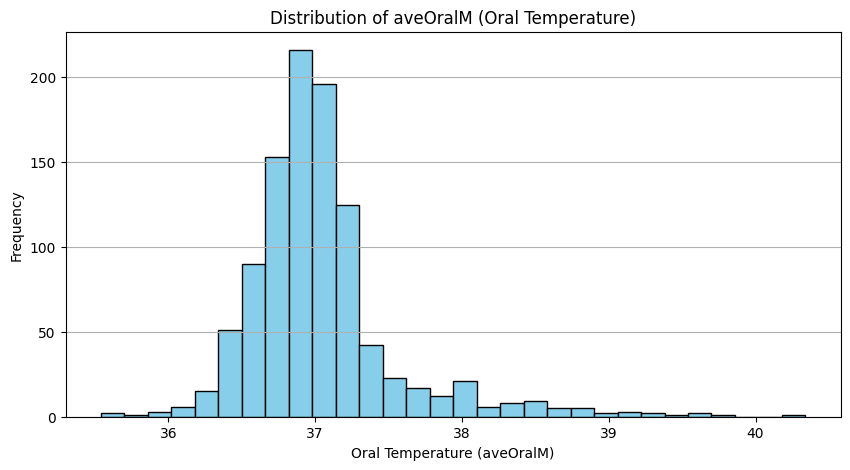

In [44]:
# Looks slightly right skewed
# Visualize the distribution of the target variable
plt.figure(figsize=(10, 5))
plt.hist(y, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of aveOralM (Oral Temperature)')
plt.xlabel('Oral Temperature (aveOralM)')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

In [45]:
# Removing outlier in distance column
X[X['Distance'] > 2]

,Gender,Age,Ethnicity,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,aveAllL13_1,T_RC1,T_RC_Dry1,T_RC_Wet1,T_RC_Max1,T_LC1,T_LC_Dry1,T_LC_Wet1,T_LC_Max1,RCC1,LCC1,canthiMax1,canthi4Max1,T_FHCC1,T_FHRC1,T_FHLC1,T_FHBC1,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1
97,Female,41-50,White,25.8,31.5,79.0,1.3075,35.2125,35.265,33.7725,33.975,35.51,35.21,35.5,35.54,35.29,35.29,35.125,35.3225,34.78,34.755,35.54,35.51,34.265,34.475,34.4875,34.095,34.3525,35.1125,34.9425,36.2425,36.08,36.1225


In [46]:
X = X.drop(index=97)
y = y.drop(index=97)

array([[<Axes: title={'center': 'T_atm'}>,
        <Axes: title={'center': 'Humidity'}>,
        <Axes: title={'center': 'Distance'}>,
        <Axes: title={'center': 'T_offset1'}>,
        <Axes: title={'center': 'Max1R13_1'}>],
       [<Axes: title={'center': 'Max1L13_1'}>,
        <Axes: title={'center': 'aveAllR13_1'}>,
        <Axes: title={'center': 'aveAllL13_1'}>,
        <Axes: title={'center': 'T_RC1'}>,
        <Axes: title={'center': 'T_RC_Dry1'}>],
       [<Axes: title={'center': 'T_RC_Wet1'}>,
        <Axes: title={'center': 'T_RC_Max1'}>,
        <Axes: title={'center': 'T_LC1'}>,
        <Axes: title={'center': 'T_LC_Dry1'}>,
        <Axes: title={'center': 'T_LC_Wet1'}>],
       [<Axes: title={'center': 'T_LC_Max1'}>,
        <Axes: title={'center': 'RCC1'}>,
        <Axes: title={'center': 'LCC1'}>,
        <Axes: title={'center': 'canthiMax1'}>,
        <Axes: title={'center': 'canthi4Max1'}>],
       [<Axes: title={'center': 'T_FHCC1'}>,
        <Axes: title={'cente

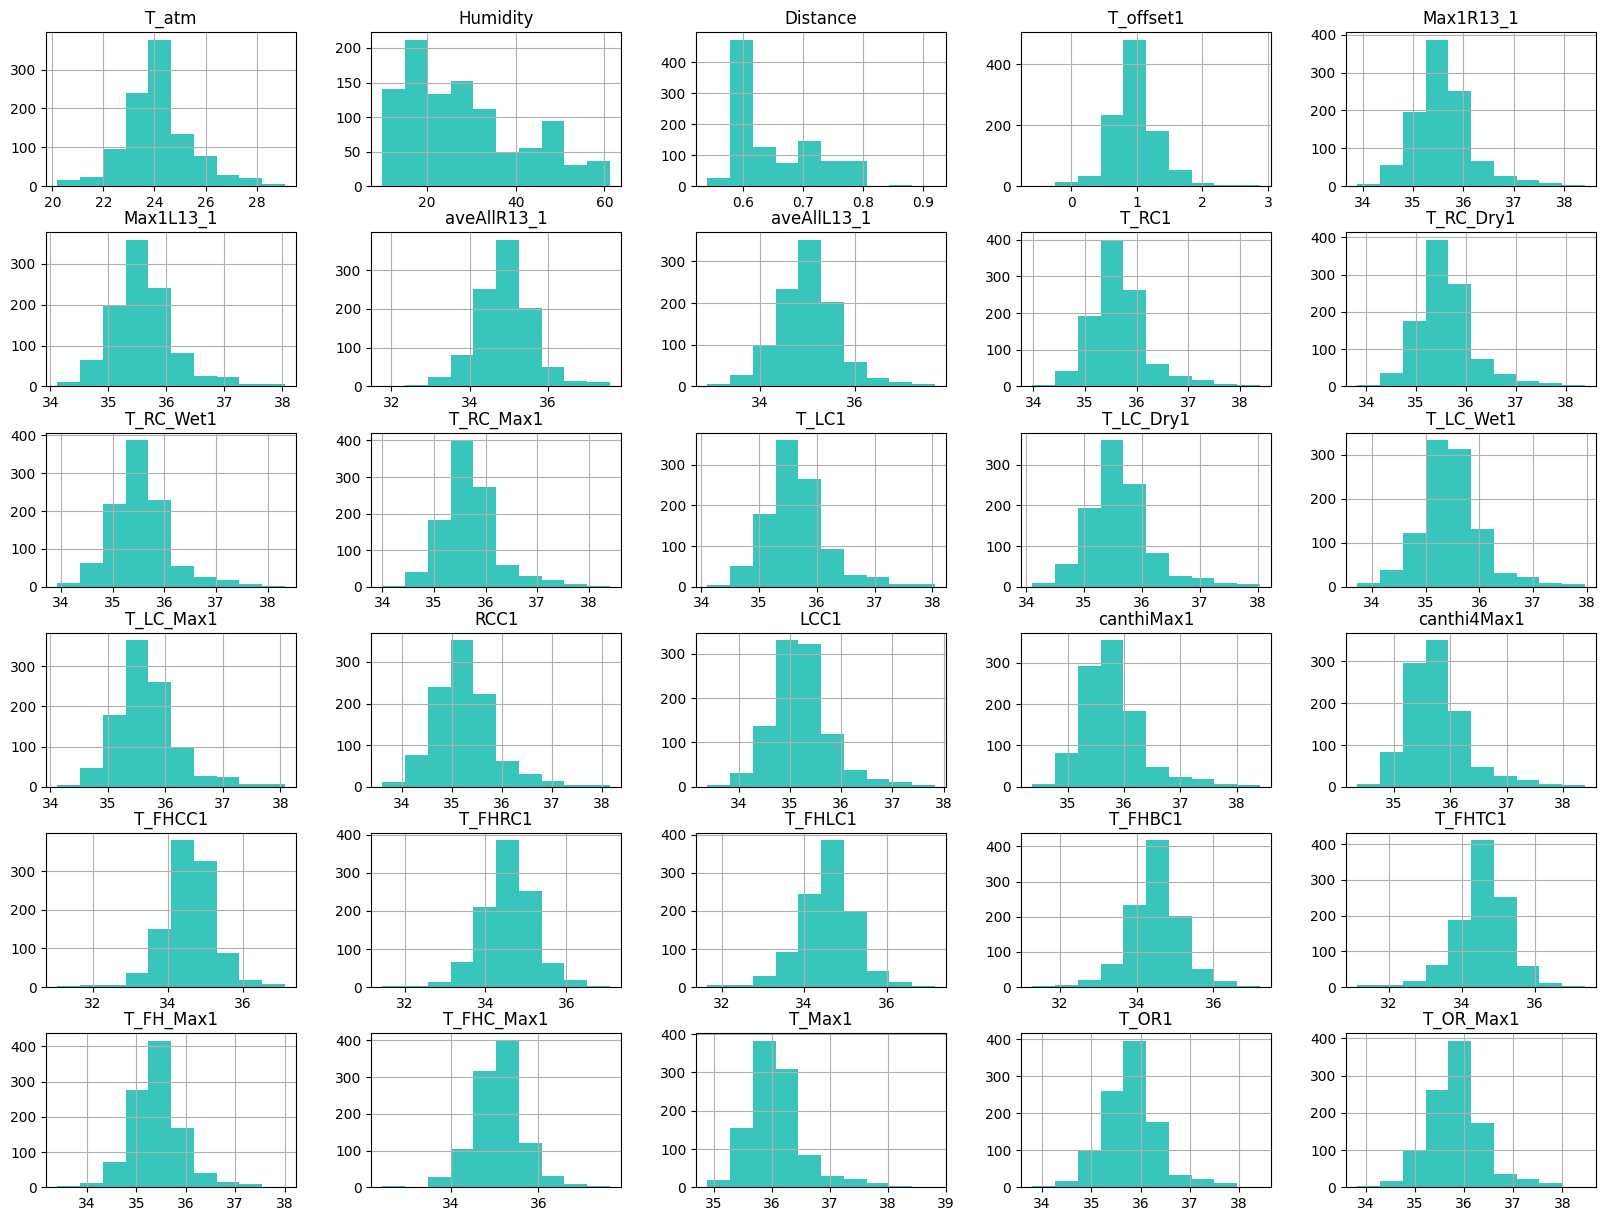

In [47]:
# Checking out X distributions
X.hist(figsize=(20,15), color="#39C5BB")

<Axes: xlabel='Age', ylabel='aveOralM'>

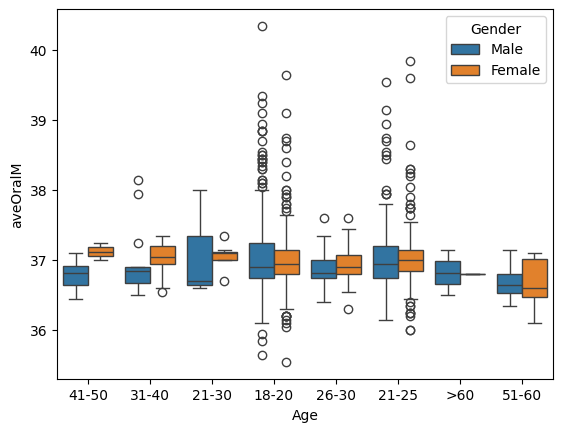

In [48]:
sns.boxplot(x=X['Age'], y=y, hue=X['Gender'])

<Axes: xlabel='Ethnicity', ylabel='aveOralM'>

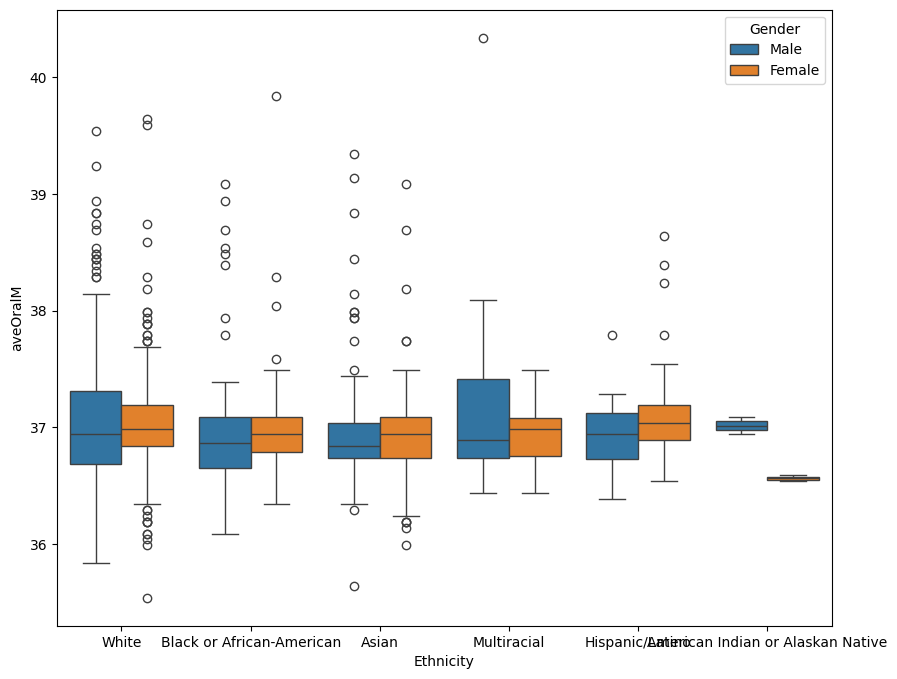

In [49]:
plt.figure(figsize=(10,8))
sns.boxplot(x=X['Ethnicity'], y=y, hue=X['Gender'])

<Axes: >

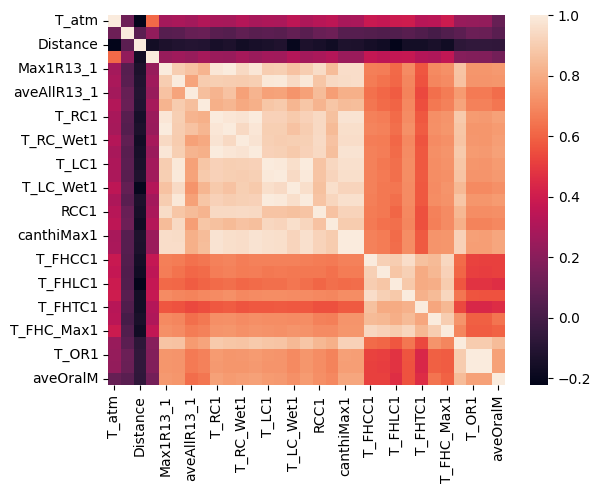

In [50]:
numerical = X.select_dtypes(include=np.number)
numerical['aveOralM'] = y
sns.heatmap(numerical.corr())

In [51]:
# scaling data
exclude_cols = ['Gender', 'Age', 'Ethnicity']

for n in X.columns:
    if n not in exclude_cols:
        X[n] = (X[n] - X[n].mean()) / X[n].std()

In [52]:
# One hot encoding
categorical_columns = ['Gender', 'Age', 'Ethnicity']
X = pd.get_dummies(X, columns=categorical_columns)
X[X.select_dtypes(include=bool).columns] = X[X.select_dtypes(include=bool).columns].astype(int)

###Initializing the model

In [53]:
class LinearRegression:
    def __init__(self, add_bias=True, learning_rate=0.004, epsilon=0.12, max_iters=1e5, batch_size=False, verbose=True, get_time=True):
        self.add_bias = add_bias
        self.learning_rate = learning_rate
        self.epsilon = epsilon
        self.max_iters = max_iters
        self.batch_size = batch_size
        self.verbose = verbose
        self.get_time = get_time
        self.w = None
        self.num_iter = None
        self.time = None
        self.gs = []
        pass

    def fit(self, x, y):

        if x.ndim == 1:                                                         # Ensure x is a 2D array
            x = x[:, None]

        N = x.shape[0]                                                          # Number of samples

        # Add a bias term to the input features if specified
        if self.add_bias:
            x = np.column_stack((x, np.ones(N)))                                # Append a column of ones for the bias term

        self.w = np.zeros((x.shape[1], 1))                                      # Initialize weights to zero

        # Track time taken for fitting if required
        if self.get_time:
            start = time.time()

        # If batch_size is False, use the normal equation method for fitting
        if not self.batch_size:
            self.w = np.linalg.pinv(x.T @ x)@x.T@y                              # Important note, use pinv instead of inv. In is unstable because all temperature measurements are highly correlated
            #self.w = np.linalg.lstsq(x, y, rcond=None)[0]  # Use rcond=None to avoid the warning
            if self.verbose:
                print('Normal equation method used')

        # Else use mini-batch stochastic gradient descent
        else:
            g = np.inf                                                          # Initialize gradient to infinity for the convergence check
            t = 0                                                               # Initialize iteration counter

            # Loop until convergence criteria are met
            while np.linalg.norm(g) > self.epsilon and t < self.max_iters:

                # Randomly sample a mini-batch from the data
                sampled_data = pd.DataFrame(np.column_stack((x, y))).sample(n=self.batch_size, replace=False)
                x_batch = np.array(sampled_data.iloc[:, :-1])  # Features for the batch
                y_batch = np.array(sampled_data.iloc[:, -1:])  # Targets for the batch

                g = self.gradient(x_batch, y_batch)  # Calculate the gradient
                self.w = self.w - self.learning_rate * g  # Update weights using gradient descent
                t += 1  # Increment the iteration counter

            self.num_iter = t
            if self.verbose:
                print(f'Number of iterations: {t}')  # Print the number of iterations performed

        if self.get_time:
            end = time.time()
            self.time = end - start  # Store the time taken for fitting
            print(f'Time taken: {self.time} seconds')  # Print the duration of the fitting process
        return self  # Return the fitted model

    def gradient(self, x, y):
        yh = x @ self.w  # Predicted values (y-hat) using current weights
        g = 2 * x.T @ (yh - y) / x.shape[0]  # Compute the gradient
        self.gs.append(np.linalg.norm(g))
        return g  # Return the computed gradient

    def predict(self, x):
        # Ensure x is a 2D array
        if x.ndim == 1:
            x = x[:, None]

        N = x.shape[0]  # Number of samples

        # Add a bias term to the input features if specified
        if self.add_bias:
            x = np.column_stack((x, np.ones(N)))  # Append a column of ones for the bias term

        yh = x @ self.w  # Calculate predicted values
        return yh  # Return the predicted values


### Fitting the model to our data

In [54]:
# Train-test split
def split(X, y, test_size=0.2, random_state=None):
  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
  x_train = x_train.to_numpy()
  x_test = x_test.to_numpy()
  y_train = y_train.to_numpy().reshape(-1, 1)
  y_test = y_test.to_numpy().reshape(-1, 1)
  return x_train, x_test, y_train, y_test
x_train, x_test, y_train, y_test = split(X, y, random_state=42)

In [55]:
# Training the model
model = LinearRegression()
model.fit(x_train, y_train);

Normal equation method used
Time taken: 0.02797698974609375 seconds


In [56]:
yh = model.predict(x_test)

### Assessing model performance

In [57]:
# Calculating cost function for test and train sets
cost_train = np.mean((y_train - model.predict(x_train)) ** 2)
cost_test = np.mean((y_test - model.predict(x_test)) ** 2)

In [58]:
#similar results, good!
cost_train, cost_test

(0.06228248031764497, 0.06502161425875529)

In [59]:
# Calculating RMSE
cost_train ** 0.5, cost_test ** 0.5

(0.24956458145667418, 0.25499336120525823)

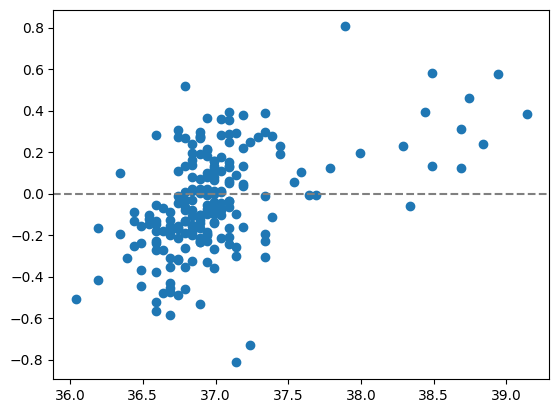

In [60]:
# calculating residuals
residuals = y_test - yh

# interestingly, our model tends to underestimate temperature when someone has a fever
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='gray', linestyle='--')

<Axes: >

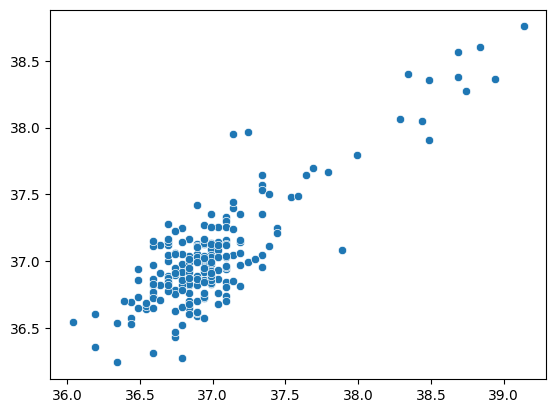

In [61]:
# Create a correlation plot
sns.scatterplot(x=y_test.flatten(), y=yh.flatten())

In [62]:
# Calculate variance explained and correlation coefficient
r2 = r2_score(y_test, yh)
print(f"variance explained: {r2}\npearson correlation: {r2 ** 0.5}")

variance explained: 0.7237822568502348
pearson correlation: 0.8507539343724687


In [63]:
# Taking a look at the weights
weights = pd.DataFrame(model.w, index=(list(X.columns)) + ['Bias'], columns=['weights'])
weights.sort_values('weights', ascending=False)

,weights
Bias,20.726335
Gender_Female,10.387853
Gender_Male,10.338482
Ethnicity_American Indian or Alaskan Native,3.594251
Ethnicity_Black or African-American,3.498964
Ethnicity_Asian,3.444250
Ethnicity_Hispanic/Latino,3.408370
Ethnicity_Multiracial,3.399720
Ethnicity_White,3.380780
Age_>60,2.750459


Normal equation method used
Time taken: 0.011960983276367188 seconds
Normal equation method used
Time taken: 0.010088920593261719 seconds
Normal equation method used
Time taken: 0.013381481170654297 seconds
Normal equation method used
Time taken: 0.003079652786254883 seconds
Normal equation method used
Time taken: 0.01231074333190918 seconds
Normal equation method used
Time taken: 0.013820171356201172 seconds
Normal equation method used
Time taken: 0.007163524627685547 seconds
Normal equation method used
Time taken: 0.008196592330932617 seconds
Normal equation method used
Time taken: 0.007172346115112305 seconds


Text(0.5, 1.0, 'Test')

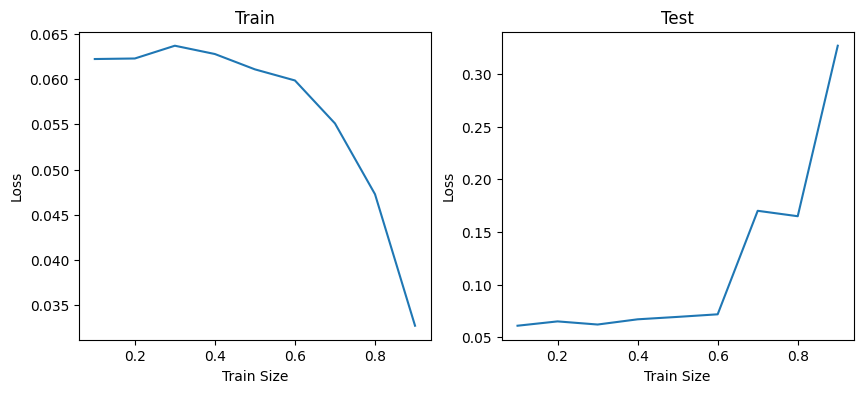

In [88]:
# Taking a look at the effect of size of training data

y_train_costs = []                                                                          # average value of cost function in training set
y_test_costs = []                                                                           # average value of cost function in test set
train_size = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]                                  # size of training set

for i in train_size:
  x_train, x_test, y_train, y_test = split(X, y, random_state=42, test_size=i) # Train-test split
  model = LinearRegression()                                                                # Initialize model
  model.fit(x_train, y_train)                                                               # Fit model
  yh_train = model.predict(x_test)
  yh_test = model.predict(x_test)

  cost_train = np.mean((y_train - model.predict(x_train)) ** 2)                             # calculating mean l2 loss
  cost_test = np.mean((y_test - model.predict(x_test)) ** 2)
  y_train_costs.append(cost_train)                                                          # appending to list
  y_test_costs.append(cost_test)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))                                       # Plotting l2 loss as a function of training set size
ax1.plot(train_size, y_train_costs, label='train')                                          # for both train and test sets
ax2.plot(train_size, y_test_costs, label='test')
ax1.set_xlabel('Train Size')
ax2.set_xlabel('Train Size')
ax1.set_ylabel('Loss')
ax2.set_ylabel('Loss')
ax1.set_title('Train')
ax2.set_title('Test')

### Mini-batch Stochastic Gradient Descent

In [66]:
# Minibatch SGD

x_train, x_test, y_train, y_test = split(X, y, random_state=42)

sizes = [2, 4, 8, 16, 32, 64, 128]
rmse_batch = []                   # Will strore rmse for each batch size
gss_batch = []                    # will store gradient norms for each batch size
t_batch = []                      # will store time for each batch size
n_iter_batch = []                 # will store number of iterations for each batch size

for s in sizes:
  model = LinearRegression(batch_size=s)
  model.fit(x_train, y_train)
  yh = model.predict(x_test)
  rmse_batch.append((np.mean((y_test - yh) ** 2)) ** 0.5)
  gss_batch.append(model.gs)
  t_batch.append(model.time)
  n_iter_batch.append(model.num_iter)

Number of iterations: 1073
Time taken: 0.5546343326568604 seconds
Number of iterations: 7768
Time taken: 6.797503709793091 seconds
Number of iterations: 9286
Time taken: 4.954284191131592 seconds
Number of iterations: 35124
Time taken: 20.882362365722656 seconds
Number of iterations: 37969
Time taken: 21.739553928375244 seconds
Number of iterations: 22131
Time taken: 13.515982389450073 seconds
Number of iterations: 11314
Time taken: 8.33198094367981 seconds


<BarContainer object of 7 artists>

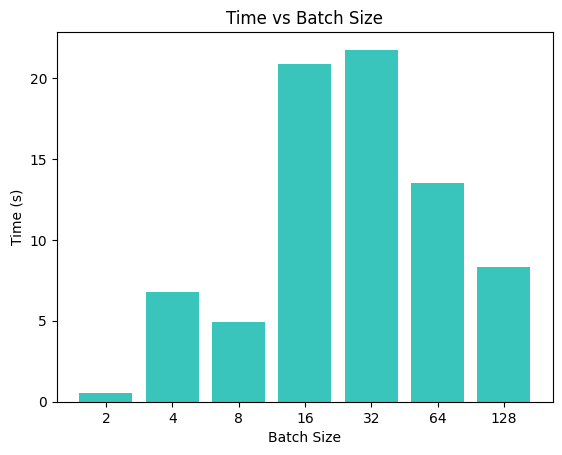

In [73]:
# Plotting time
batches_str = ['2', '4', '8', '16', '32', '64', '128']
plt.xlabel('Batch Size')
plt.ylabel('Time (s)')
plt.title('Time vs Batch Size')
plt.bar(batches_str, t_batch, color = "#39C5BB")

<BarContainer object of 7 artists>

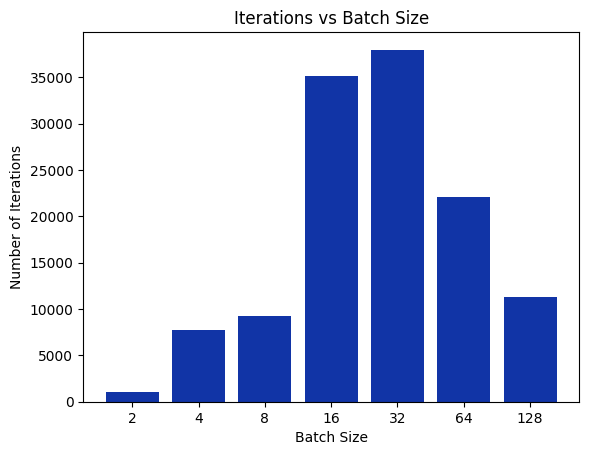

In [87]:
# Plotting iterations
plt.xlabel('Batch Size')
plt.ylabel('Number of Iterations')
plt.title('Iterations vs Batch Size')
plt.bar(batches_str, n_iter_batch, color = "#1134A6")

<BarContainer object of 7 artists>

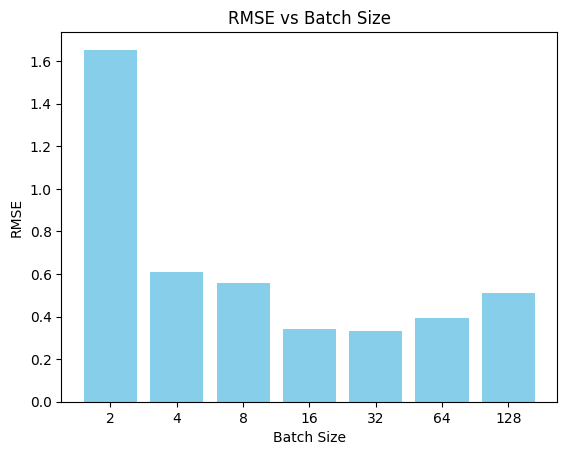

In [75]:
# Plotting performance
plt.xlabel('Batch Size')
plt.ylabel('RMSE')
plt.title('RMSE vs Batch Size')
plt.bar(batches_str, rmse_batch, color = "skyblue")

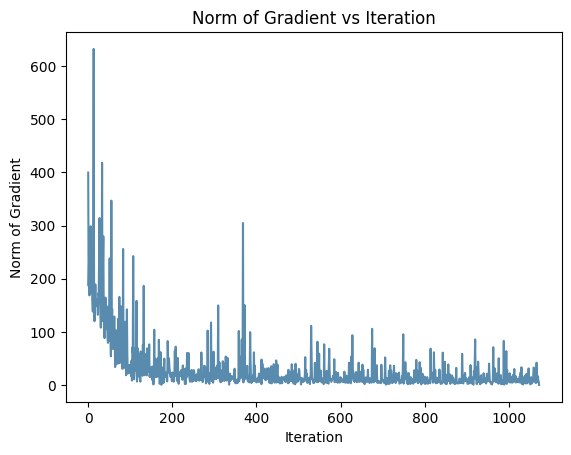

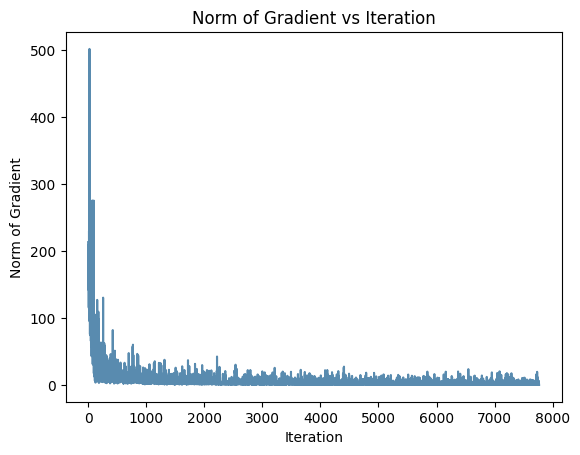

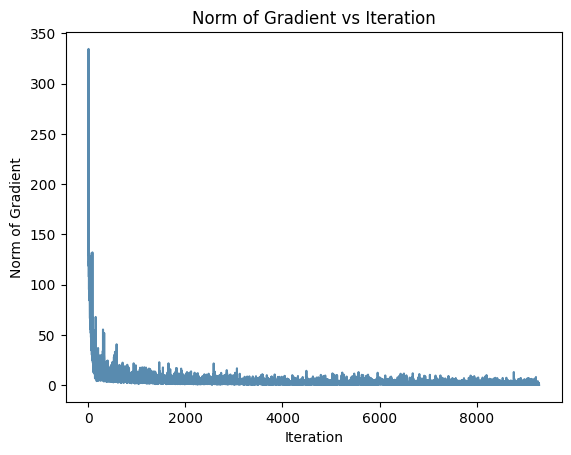

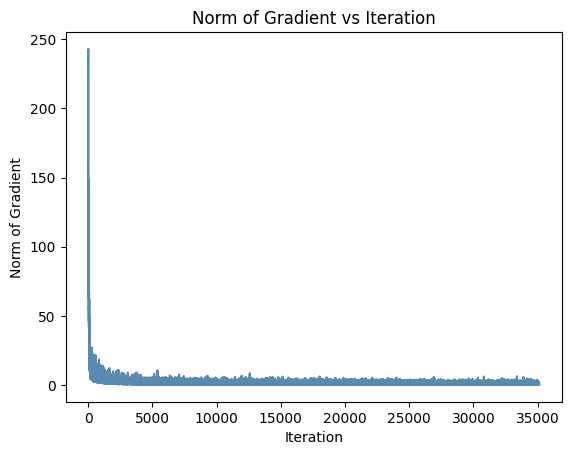

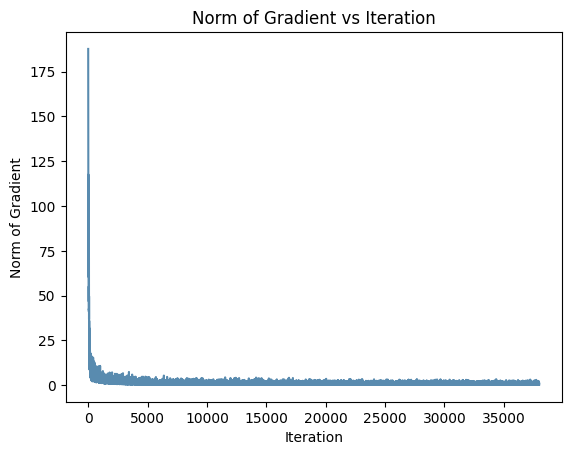

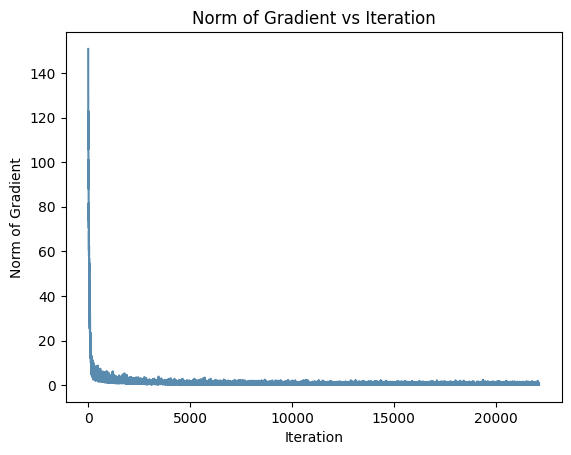

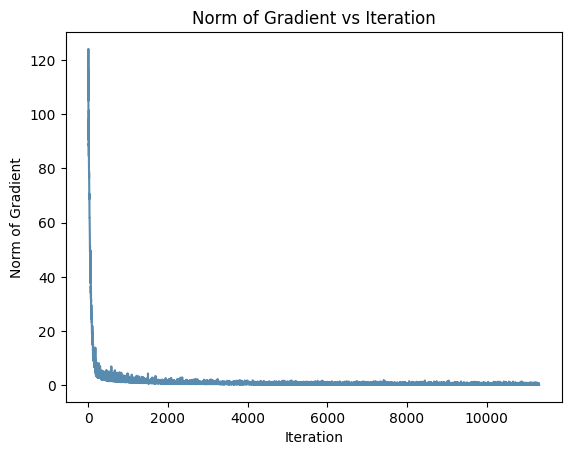

In [76]:
# Looking at norm of gradient
# much more stable starting at 32
for g in gss_batch:
  plt.xlabel('Iteration')
  plt.ylabel('Norm of Gradient')
  plt.title('Norm of Gradient vs Iteration')
  plt.plot(g, color = "#598BAF")
  plt.show()

In [78]:
# Different learning rates
# Need to complete this

learning_rates = [.0001, .001, 0.01, 0.1]
rmse_lr = []
gss_lr = []
t_lr = []
n_iter_lr = []


for l in learning_rates:
  model = LinearRegression(learning_rate=l, batch_size=64)
  model.fit(x_train, y_train)
  yh = model.predict(x_test)
  rmse_lr.append((np.mean((y_test - yh) ** 2)) ** 0.5)
  gss_lr.append(model.gs)
  t_lr.append(model.time)
  n_iter_lr.append(model.num_iter)

Number of iterations: 100000
Time taken: 63.56041979789734 seconds
Number of iterations: 47160
Time taken: 29.44414782524109 seconds
Number of iterations: 12191
Time taken: 9.019705295562744 seconds
Number of iterations: 616
Time taken: 0.4031026363372803 seconds


<ipython-input-53-f8bd02df2c9e>:69: RuntimeWarning: overflow encountered in matmul
  g = 2 * x.T @ (yh - y) / x.shape[0]  # Compute the gradient
<ipython-input-53-f8bd02df2c9e>:68: RuntimeWarning: invalid value encountered in matmul
  yh = x @ self.w  # Predicted values (y-hat) using current weights
<ipython-input-53-f8bd02df2c9e>:69: RuntimeWarning: invalid value encountered in matmul
  g = 2 * x.T @ (yh - y) / x.shape[0]  # Compute the gradient


<BarContainer object of 4 artists>

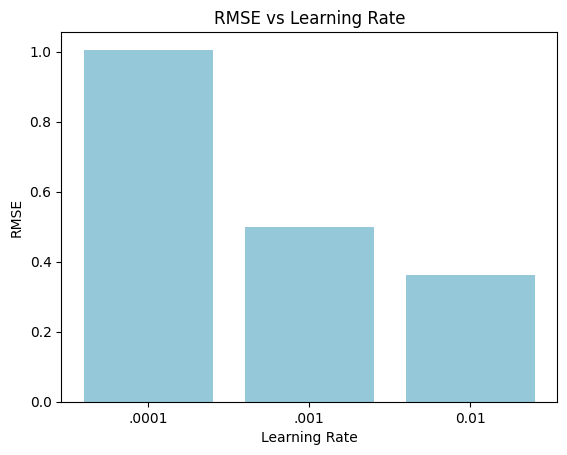

In [79]:
plt.xlabel('Learning Rate')
plt.ylabel('RMSE')
plt.title('RMSE vs Learning Rate')
plt.bar(['0.0001', '0.001', '0.01', '0.1'], rmse_lr, color = "#95C8D8")

<BarContainer object of 4 artists>

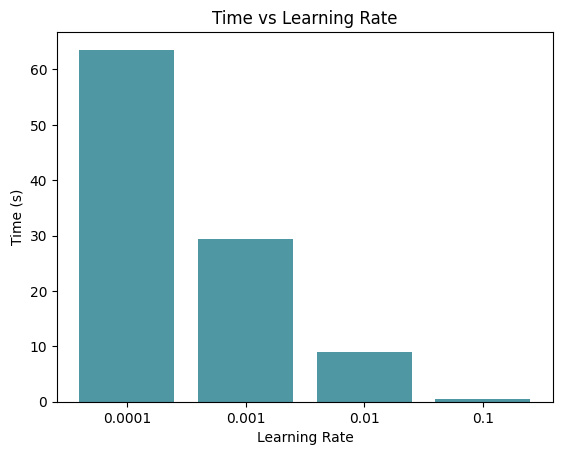

In [81]:
plt.xlabel('Learning Rate')
plt.ylabel('Time (s)')
plt.title('Time vs Learning Rate')
plt.bar(['0.0001', '0.001', '0.01', '0.1'], t_lr, color = "#5097A4")

<BarContainer object of 4 artists>

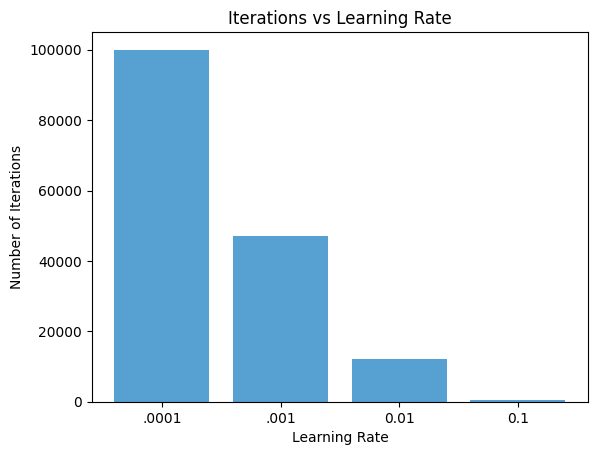

In [82]:
plt.xlabel('Learning Rate')
plt.ylabel('Number of Iterations')
plt.title('Iterations vs Learning Rate')
plt.bar(['.0001', '.001', '0.01', '0.1'], n_iter_lr, color = "#57A0D2")

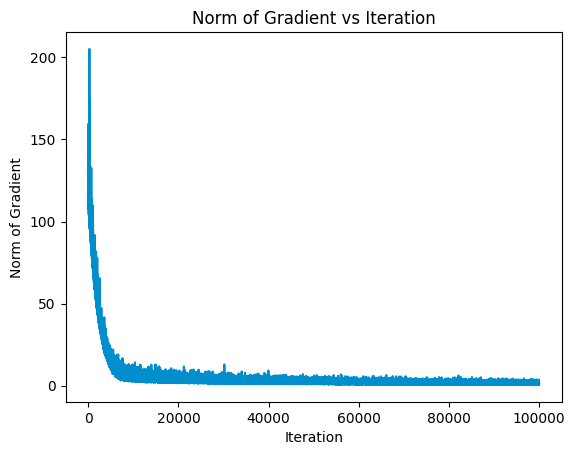

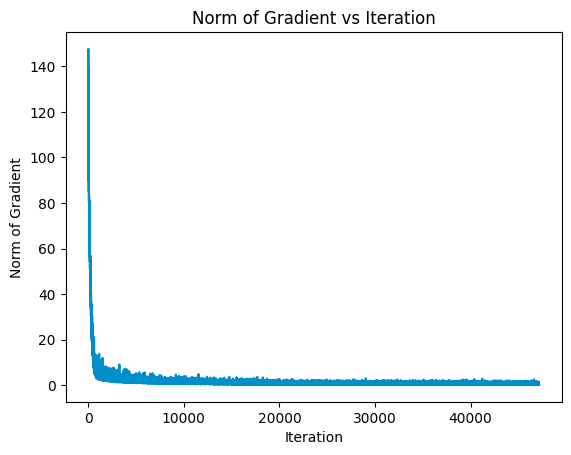

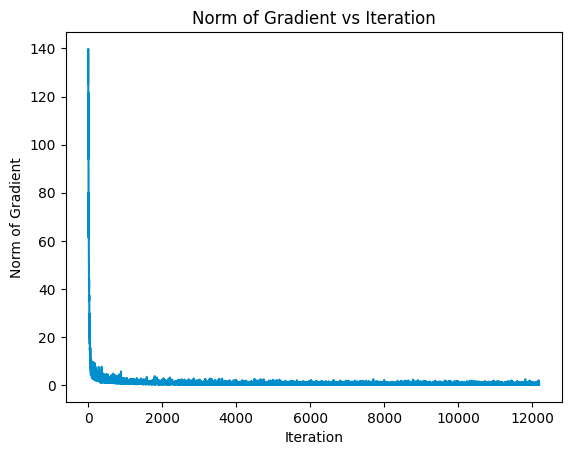

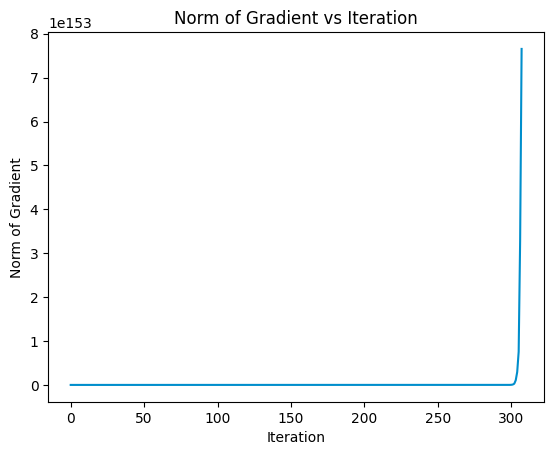

In [83]:
for g in gss_lr:
  plt.xlabel('Iteration')
  plt.ylabel('Norm of Gradient')
  plt.title('Norm of Gradient vs Iteration')
  plt.plot(g, color = "#008ECC")
  plt.show()

In [84]:
# Analytical vs mini-batch
model = LinearRegression()
model.fit(x_train, y_train)
yh_analytical = model.predict(x_test)
t_analytical = model.time
rmse_batch.append((np.mean((y_test - yh_analytical) ** 2)) ** 0.5)
t_batch.append(t_analytical)


Normal equation method used
Time taken: 0.008011579513549805 seconds


<BarContainer object of 8 artists>

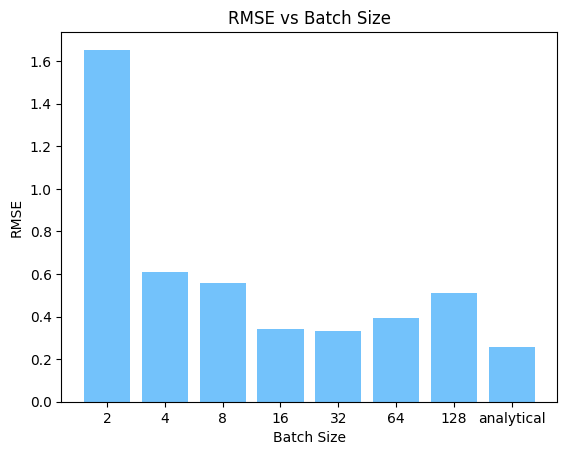

In [85]:
plt.xlabel('Batch Size')
plt.ylabel('RMSE')
plt.title('RMSE vs Batch Size')
plt.bar(['2', '4', '8', '16', '32', '64', '128', 'analytical'], rmse_batch, color = "#73C2FB")

<BarContainer object of 8 artists>

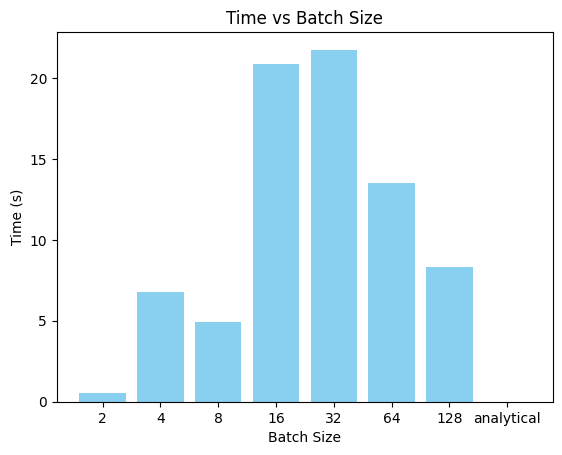

In [86]:
plt.xlabel('Batch Size')
plt.ylabel('Time (s)')
plt.title('Time vs Batch Size')
plt.bar(['2', '4', '8', '16', '32', '64', '128', 'analytical'], t_batch, color = "#89CFEF")